In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.46MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 21.4MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [2]:
loss_fn = nn.CrossEntropyLoss()

In [3]:
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    sum_loss = 0
    num_batches = len(dataloader)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    sum_loss /= num_batches
    return sum_loss

In [5]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [14]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    train_loss = []
    test_loss = []
    test_acc = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
        test_acc.append(round(acc*100, 1))
    print("Done!")

    return train_loss, test_loss, test_acc

In [23]:
learning_rate = 1e-3
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
batch_size = 64
epochs = 5

In [24]:
train_loss_sgd, test_loss_sgd, acc_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.294213  [   64/60000]
loss: 2.288164  [ 6464/60000]
loss: 2.269090  [12864/60000]
loss: 2.266167  [19264/60000]
loss: 2.243370  [25664/60000]
loss: 2.224343  [32064/60000]
loss: 2.223776  [38464/60000]
loss: 2.198241  [44864/60000]
loss: 2.192426  [51264/60000]
loss: 2.163773  [57664/60000]
Test Error: 
 Accuracy: 57.2%, Avg loss: 2.152909 

Epoch 2
-------------------------------
loss: 2.156558  [   64/60000]
loss: 2.153835  [ 6464/60000]
loss: 2.088322  [12864/60000]
loss: 2.107086  [19264/60000]
loss: 2.060572  [25664/60000]
loss: 1.998070  [32064/60000]
loss: 2.028956  [38464/60000]
loss: 1.951455  [44864/60000]
loss: 1.958293  [51264/60000]
loss: 1.890571  [57664/60000]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.880326 

Epoch 3
-------------------------------
loss: 1.905641  [   64/60000]
loss: 1.887663  [ 6464/60000]
loss: 1.756914  [12864/60000]
loss: 1.804299  [19264/60000]
loss: 1.707929  [25664/60000]
loss: 1.644722  [32064/600

In [25]:
print(train_loss_sgd)
print(test_loss_sgd)
print(acc_sgd)

[2.232735811266055, 2.0293004343758767, 1.6933672428131104, 1.3706408721297534, 1.1601634942519385]
[2.1529089903375906, 1.8803263158555243, 1.5171649372501739, 1.2545044331034279, 1.0918326791684339]
[57.2, 58.8, 61.4, 63.0, 64.4]


In [18]:
model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
train_loss_rms, test_loss_rms, acc_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.308615  [   64/60000]
loss: 0.572268  [ 6464/60000]
loss: 0.457102  [12864/60000]
loss: 0.473090  [19264/60000]
loss: 0.477801  [25664/60000]
loss: 0.436314  [32064/60000]
loss: 0.391657  [38464/60000]
loss: 0.548304  [44864/60000]
loss: 0.533322  [51264/60000]
loss: 0.404109  [57664/60000]
Test Error: 
 Accuracy: 83.5%, Avg loss: 0.440390 

Epoch 2
-------------------------------
loss: 0.256204  [   64/60000]
loss: 0.327234  [ 6464/60000]
loss: 0.291029  [12864/60000]
loss: 0.344443  [19264/60000]
loss: 0.334666  [25664/60000]
loss: 0.375809  [32064/60000]
loss: 0.290703  [38464/60000]
loss: 0.469066  [44864/60000]
loss: 0.381151  [51264/60000]
loss: 0.350868  [57664/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.428224 

Epoch 3
-------------------------------
loss: 0.231362  [   64/60000]
loss: 0.324218  [ 6464/60000]
loss: 0.216841  [12864/60000]
loss: 0.283202  [19264/60000]
loss: 0.365651  [25664/60000]
loss: 0.375265  [32064/600

In [19]:
print(train_loss_rms)
print(test_loss_rms)
print(acc_rms)

[0.5161639117260477, 0.3815077897756974, 0.34970128544167417, 0.3293470162382004, 0.3145527179037203]
[0.4403903170186243, 0.4282236188460308, 0.3872968269761201, 0.4044811400543353, 0.4575393311916643]
[83.5, 84.8, 86.7, 86.8, 85.4]


In [12]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

### ДЗ

#### Анализ методов оптимизации

In [66]:
optim_methods_results = dict()
model = NeuralNetwork()

epochs = 50
learning_rate = 1e-3
batch_size = 64

In [67]:
def optim_methods_analysis(model, optimizer, optim_method_name):

    # Функция запускает tun_training и возвращает среднее значение функции потерь
    # при обучении, при тренироке и оценку точности accuracy для каджой эпохи

    print(optim_method_name)
    train_loss, test_loss, acc = run_training(epochs, train_dataloader, model, loss_fn, optimizer)
    optim_methods_results[optim_method_name].append(train_loss)
    optim_methods_results[optim_method_name].append(test_loss)
    optim_methods_results[optim_method_name].append(acc)

#### Применение для каждого метода оптимизации

In [68]:
# SDG

model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
method_name = "SGD"

optim_methods_results[method_name] = []
optim_methods_analysis(model, optimizer, method_name)

SGD
Epoch 1
-------------------------------
loss: 2.307573  [   64/60000]
loss: 2.295906  [ 6464/60000]
loss: 2.279014  [12864/60000]
loss: 2.268541  [19264/60000]
loss: 2.258590  [25664/60000]
loss: 2.242481  [32064/60000]
loss: 2.236590  [38464/60000]
loss: 2.214171  [44864/60000]
loss: 2.200979  [51264/60000]
loss: 2.176281  [57664/60000]
Test Error: 
 Accuracy: 52.4%, Avg loss: 2.169953 

Epoch 2
-------------------------------
loss: 2.176936  [   64/60000]
loss: 2.168103  [ 6464/60000]
loss: 2.112712  [12864/60000]
loss: 2.125248  [19264/60000]
loss: 2.084878  [25664/60000]
loss: 2.036156  [32064/60000]
loss: 2.053061  [38464/60000]
loss: 1.982508  [44864/60000]
loss: 1.979310  [51264/60000]
loss: 1.920386  [57664/60000]
Test Error: 
 Accuracy: 57.6%, Avg loss: 1.913159 

Epoch 3
-------------------------------
loss: 1.938749  [   64/60000]
loss: 1.916210  [ 6464/60000]
loss: 1.798690  [12864/60000]
loss: 1.837441  [19264/60000]
loss: 1.735422  [25664/60000]
loss: 1.686954  [32064

In [69]:
# RMSprop

model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
method_name = "RMSprop"

optim_methods_results[method_name] = []
optim_methods_analysis(model, optimizer, method_name)

RMSprop
Epoch 1
-------------------------------
loss: 2.302237  [   64/60000]
loss: 0.567024  [ 6464/60000]
loss: 0.456644  [12864/60000]
loss: 0.483241  [19264/60000]
loss: 0.464213  [25664/60000]
loss: 0.460530  [32064/60000]
loss: 0.400258  [38464/60000]
loss: 0.500629  [44864/60000]
loss: 0.515848  [51264/60000]
loss: 0.433809  [57664/60000]
Test Error: 
 Accuracy: 83.1%, Avg loss: 0.447122 

Epoch 2
-------------------------------
loss: 0.250752  [   64/60000]
loss: 0.347515  [ 6464/60000]
loss: 0.306374  [12864/60000]
loss: 0.358888  [19264/60000]
loss: 0.356673  [25664/60000]
loss: 0.405058  [32064/60000]
loss: 0.284725  [38464/60000]
loss: 0.462740  [44864/60000]
loss: 0.429588  [51264/60000]
loss: 0.391130  [57664/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.423175 

Epoch 3
-------------------------------
loss: 0.227342  [   64/60000]
loss: 0.340068  [ 6464/60000]
loss: 0.237374  [12864/60000]
loss: 0.299627  [19264/60000]
loss: 0.338931  [25664/60000]
loss: 0.376761  [3

In [70]:
# Adagrad

model = NeuralNetwork()
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)
method_name = "Adagrad"

optim_methods_results[method_name] = []
optim_methods_analysis(model, optimizer, method_name)

Adagrad
Epoch 1
-------------------------------
loss: 2.302852  [   64/60000]
loss: 0.820777  [ 6464/60000]
loss: 0.515846  [12864/60000]
loss: 0.711649  [19264/60000]
loss: 0.547620  [25664/60000]
loss: 0.557427  [32064/60000]
loss: 0.552867  [38464/60000]
loss: 0.641060  [44864/60000]
loss: 0.605716  [51264/60000]
loss: 0.526169  [57664/60000]
Test Error: 
 Accuracy: 81.4%, Avg loss: 0.525067 

Epoch 2
-------------------------------
loss: 0.419528  [   64/60000]
loss: 0.528549  [ 6464/60000]
loss: 0.365456  [12864/60000]
loss: 0.566875  [19264/60000]
loss: 0.457746  [25664/60000]
loss: 0.489412  [32064/60000]
loss: 0.468827  [38464/60000]
loss: 0.636304  [44864/60000]
loss: 0.580146  [51264/60000]
loss: 0.463940  [57664/60000]
Test Error: 
 Accuracy: 82.9%, Avg loss: 0.485422 

Epoch 3
-------------------------------
loss: 0.353312  [   64/60000]
loss: 0.480082  [ 6464/60000]
loss: 0.328268  [12864/60000]
loss: 0.523715  [19264/60000]
loss: 0.417662  [25664/60000]
loss: 0.456328  [3

In [71]:
# Adadelta

model = NeuralNetwork()
optimizer = torch.optim.Adadelta(model.parameters(), lr = learning_rate)
method_name = "Adadelta"

optim_methods_results[method_name] = []
optim_methods_analysis(model, optimizer, method_name)

Adadelta
Epoch 1
-------------------------------
loss: 2.307955  [   64/60000]
loss: 2.291077  [ 6464/60000]
loss: 2.275925  [12864/60000]
loss: 2.262640  [19264/60000]
loss: 2.260341  [25664/60000]
loss: 2.228561  [32064/60000]
loss: 2.229824  [38464/60000]
loss: 2.206609  [44864/60000]
loss: 2.196759  [51264/60000]
loss: 2.172062  [57664/60000]
Test Error: 
 Accuracy: 51.9%, Avg loss: 2.170589 

Epoch 2
-------------------------------
loss: 2.185056  [   64/60000]
loss: 2.169529  [ 6464/60000]
loss: 2.125622  [12864/60000]
loss: 2.134458  [19264/60000]
loss: 2.112067  [25664/60000]
loss: 2.058377  [32064/60000]
loss: 2.083628  [38464/60000]
loss: 2.029655  [44864/60000]
loss: 2.029093  [51264/60000]
loss: 1.984104  [57664/60000]
Test Error: 
 Accuracy: 59.8%, Avg loss: 1.983748 

Epoch 3
-------------------------------
loss: 2.012287  [   64/60000]
loss: 1.989012  [ 6464/60000]
loss: 1.909077  [12864/60000]
loss: 1.942435  [19264/60000]
loss: 1.885841  [25664/60000]
loss: 1.828906  [

In [72]:
# Adam

model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
method_name = "Adam"

optim_methods_results[method_name] = []
optim_methods_analysis(model, optimizer, method_name)

Adam
Epoch 1
-------------------------------
loss: 2.299092  [   64/60000]
loss: 0.555669  [ 6464/60000]
loss: 0.390639  [12864/60000]
loss: 0.507703  [19264/60000]
loss: 0.463571  [25664/60000]
loss: 0.444961  [32064/60000]
loss: 0.380665  [38464/60000]
loss: 0.533711  [44864/60000]
loss: 0.476803  [51264/60000]
loss: 0.542438  [57664/60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.422503 

Epoch 2
-------------------------------
loss: 0.299727  [   64/60000]
loss: 0.360668  [ 6464/60000]
loss: 0.274745  [12864/60000]
loss: 0.396466  [19264/60000]
loss: 0.417493  [25664/60000]
loss: 0.371255  [32064/60000]
loss: 0.308907  [38464/60000]
loss: 0.473631  [44864/60000]
loss: 0.381170  [51264/60000]
loss: 0.459708  [57664/60000]
Test Error: 
 Accuracy: 86.1%, Avg loss: 0.382660 

Epoch 3
-------------------------------
loss: 0.243753  [   64/60000]
loss: 0.308045  [ 6464/60000]
loss: 0.224551  [12864/60000]
loss: 0.352340  [19264/60000]
loss: 0.403921  [25664/60000]
loss: 0.345588  [3206

In [73]:
# NAdam

model = NeuralNetwork()
optimizer = torch.optim.NAdam(model.parameters(), lr = learning_rate)
method_name = "NAdam"

optim_methods_results[method_name] = []
optim_methods_analysis(model, optimizer, method_name)

NAdam
Epoch 1
-------------------------------
loss: 2.310724  [   64/60000]
loss: 0.598434  [ 6464/60000]
loss: 0.448451  [12864/60000]
loss: 0.447256  [19264/60000]
loss: 0.432193  [25664/60000]
loss: 0.421343  [32064/60000]
loss: 0.400969  [38464/60000]
loss: 0.496105  [44864/60000]
loss: 0.450189  [51264/60000]
loss: 0.445794  [57664/60000]
Test Error: 
 Accuracy: 84.3%, Avg loss: 0.421587 

Epoch 2
-------------------------------
loss: 0.257607  [   64/60000]
loss: 0.344225  [ 6464/60000]
loss: 0.252953  [12864/60000]
loss: 0.341044  [19264/60000]
loss: 0.327786  [25664/60000]
loss: 0.362716  [32064/60000]
loss: 0.300710  [38464/60000]
loss: 0.415058  [44864/60000]
loss: 0.356734  [51264/60000]
loss: 0.381615  [57664/60000]
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.375077 

Epoch 3
-------------------------------
loss: 0.228291  [   64/60000]
loss: 0.313518  [ 6464/60000]
loss: 0.197013  [12864/60000]
loss: 0.300430  [19264/60000]
loss: 0.345918  [25664/60000]
loss: 0.323934  [320

In [74]:
# Adamax

model = NeuralNetwork()
optimizer = torch.optim.Adamax(model.parameters(), lr = learning_rate)
method_name = "Adamax"

optim_methods_results[method_name] = []
optim_methods_analysis(model, optimizer, method_name)

Adamax
Epoch 1
-------------------------------
loss: 2.317384  [   64/60000]
loss: 0.738029  [ 6464/60000]
loss: 0.416211  [12864/60000]
loss: 0.604779  [19264/60000]
loss: 0.513098  [25664/60000]
loss: 0.466199  [32064/60000]
loss: 0.444018  [38464/60000]
loss: 0.590335  [44864/60000]
loss: 0.527009  [51264/60000]
loss: 0.526094  [57664/60000]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.451943 

Epoch 2
-------------------------------
loss: 0.291512  [   64/60000]
loss: 0.401190  [ 6464/60000]
loss: 0.306591  [12864/60000]
loss: 0.468987  [19264/60000]
loss: 0.409613  [25664/60000]
loss: 0.384563  [32064/60000]
loss: 0.362605  [38464/60000]
loss: 0.513143  [44864/60000]
loss: 0.445520  [51264/60000]
loss: 0.499655  [57664/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.401619 

Epoch 3
-------------------------------
loss: 0.244732  [   64/60000]
loss: 0.337143  [ 6464/60000]
loss: 0.261865  [12864/60000]
loss: 0.376470  [19264/60000]
loss: 0.324308  [25664/60000]
loss: 0.354616  [32

#### Результат

In [75]:
from matplotlib import pyplot as plt

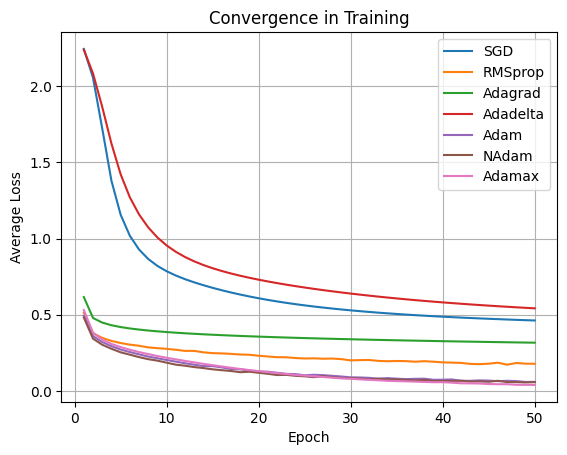

In [91]:
# Изменение значений функции потерь при тренировке

ax1 = plt.axes()
ax1.set(title="Сonvergence in Training", xlabel="Epoch", ylabel="Average Loss")

for key, item in optim_methods_results.items():
    ax1.plot(range(1, epochs + 1), item[0], label=key)

ax1.grid()
ax1.legend()

plt.show()

##### Сходимость при тестрировании

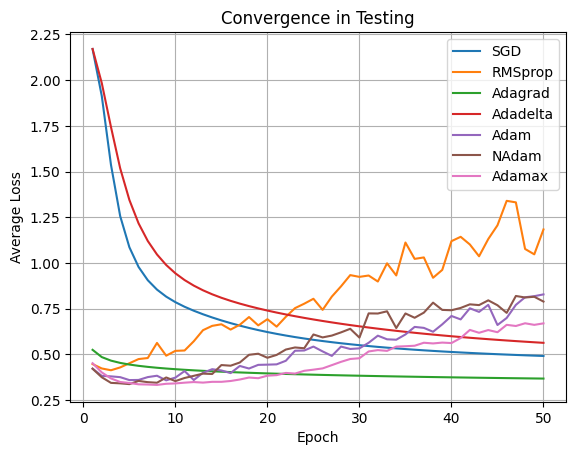

In [84]:
# Изменение значений функции потерь при тестировании

ax2 = plt.axes()
ax2.set(title="Сonvergence in Testing", xlabel="Epoch", ylabel="Average Loss")

for key, item in optim_methods_results.items():
    ax2.plot(range(1, epochs + 1), item[1], label=key)

ax2.grid()
ax2.legend()
plt.show()

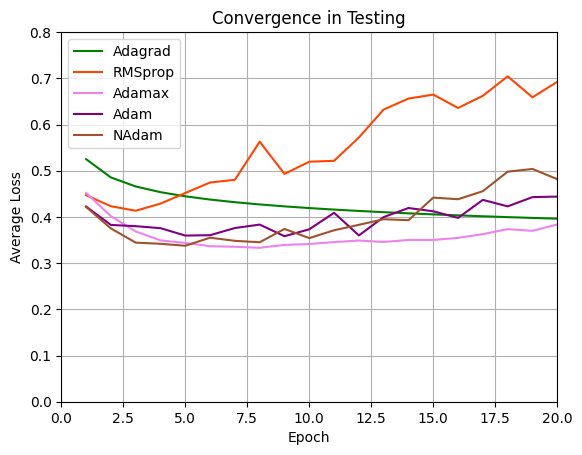

In [94]:
ax2 = plt.axes()
ax2.set(title="Сonvergence in Testing", xlabel="Epoch", ylabel="Average Loss", xlim=[0, 20], ylim=[0, 0.8])

ax2.plot(range(1, epochs + 1), optim_methods_results["Adagrad"][1], label="Adagrad", color="green")
ax2.plot(range(1, epochs + 1), optim_methods_results["RMSprop"][1], label="RMSprop", color="orangered")
ax2.plot(range(1, epochs + 1), optim_methods_results["Adamax"][1], label="Adamax", color="violet")
ax2.plot(range(1, epochs + 1), optim_methods_results["Adam"][1], label="Adam", color="purple")
ax2.plot(range(1, epochs + 1), optim_methods_results["NAdam"][1], label="NAdam", color="sienna")

ax2.grid()
ax2.legend()
plt.show()

##### Оценка точности

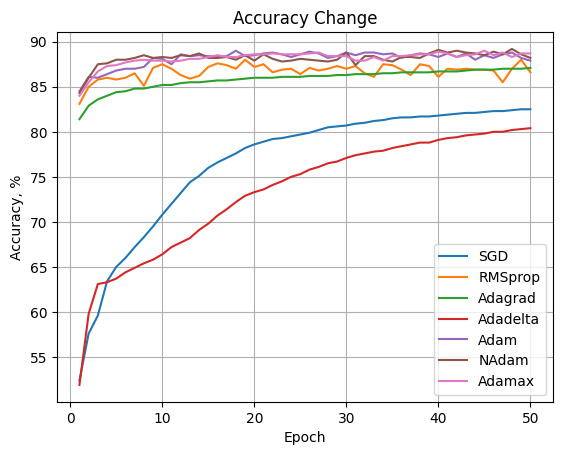

In [90]:
# Изменение оценки точности

ax3 = plt.axes()
ax3.set(title="Accuracy Change", xlabel="Epoch", ylabel="Accuracy, %")

for key, item in optim_methods_results.items():
    ax3.plot(range(1, epochs + 1), item[2], label=key)

ax3.grid()
ax3.legend()
plt.show()

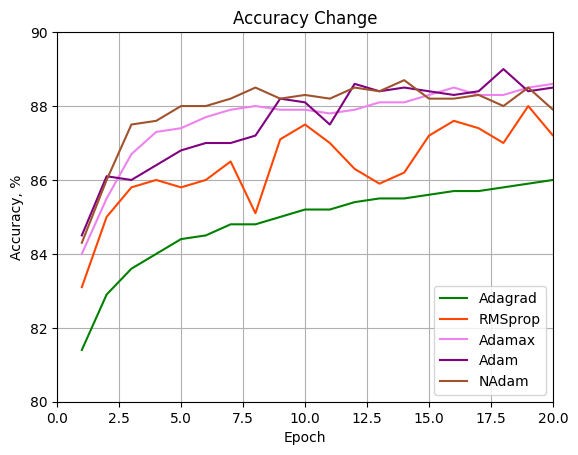

In [93]:
# Изменение оценки точности

ax3 = plt.axes()
ax3.set(title="Accuracy Change", xlabel="Epoch", ylabel="Accuracy, %", xlim=[0, 20], ylim=[80, 90])

ax3.plot(range(1, epochs + 1), optim_methods_results["Adagrad"][2], label="Adagrad", color="green")
ax3.plot(range(1, epochs + 1), optim_methods_results["RMSprop"][2], label="RMSprop", color="orangered")
ax3.plot(range(1, epochs + 1), optim_methods_results["Adamax"][2], label="Adamax", color="violet")
ax3.plot(range(1, epochs + 1), optim_methods_results["Adam"][2], label="Adam", color="purple")
ax3.plot(range(1, epochs + 1), optim_methods_results["NAdam"][2], label="NAdam", color="sienna")

ax3.grid()
ax3.legend()
plt.show()

##### Выводы

Cкорость сходимости при методах NAdam, Adam, Adamax, RMSprop выше скорости сходимости при остальных методах.
Функции потерь этих методов начинают расти на начальных эпохах:<br>
У RMSprop - после третьей эпохи;<br>
У Adam и NAdam - после пятой эпохи;<br>
У Adamax - после восьмой эпохи.<br>


Наибольшая оценка точности при методах Adam, Adamax, Nadam.

При методах SGD и Adadelta скорость сходимости намного ниже, но с увеличением количества эпох оценка точности растет.